In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## Graph Creation

In [2]:
bsb = {
    'Plano Piloto':['Brazlândia', 'Sobradinho', 'Varjão', 'Lago Norte', 'Sudoeste', 'Cruzeiro', 'SIA', 'SCIA_Estrutural', 'Taguatinga'],
    'Gama':['Santa Maria', 'Recanto das Emas', 'Riacho_Fundo_II', 'Park Way'],
    'Taguatinga':['Ceilândia', 'Brazlândia', 'Plano Piloto', 'Vicente Pires', 'SCIA_Estrutural', 'Guará', 'Águas Claras', 'Riacho Fundo', 'Samambaia'],
    'Brazlândia':['Ceilândia','Plano Piloto', 'Sobradinho', 'Sobradinho II'],
    'Sobradinho':['Brazlândia', 'Plano Piloto', 'Planaltina', 'Lago Norte', 'Itapoã'],
    'Planaltina':['Sobradinho II', 'Sobradinho', 'Itapoã', 'Paranoá'],
    'Paranoá':['Planaltina', 'Itapoã', 'Lago Norte', 'Jardim Botânico', 'São Sebastião'],
    'Núcleo Bandeirante':['Águas Claras', 'Guará', 'Candangolândia', 'Lago Sul', 'Park Way', 'Riacho Fundo'],
    'Ceilândia':['Taguatinga','Samambaia', 'Brazlândia'],
    'Guará':['Vicente Pires', 'SCIA_Estrutural', 'SIA', 'Candangolândia', 'Núcleo Bandeirante', 'Águas Claras', 'Taguatinga'],
    'Cruzeiro':['SIA', 'Sudoeste', 'Plano Piloto'],
    'Samambaia':['Ceilândia', 'Taguatinga', 'Riacho Fundo', 'Riacho_Fundo_II'],
    'Santa Maria':['São Sebastião', 'Gama', 'Lago Sul', 'Park Way'],
    'São Sebastião':['Paranoá', 'Jardim Botânico', 'Lago Sul', 'Santa Maria'],
    'Recanto das Emas':['Samambaia', 'Gama', 'Riacho_Fundo_II'],
    'Lago Sul':['Santa Maria', 'Park Way','Núcleo Bandeirante', 'Candangolândia', ],
    'Riacho Fundo':['Samambaia', 'Taguatinga', 'Águas Claras', 'Núcleo Bandeirante', 'Park Way'],
    'Lago Norte':['Plano Piloto', 'Varjão', 'Sobradinho', 'Itapoã', 'Paranoá'],
    'Candangolândia':['Guará','Plano Piloto', 'Lago Sul'],
    'Águas Claras':['Taguatinga', 'Guará', 'Núcleo Bandeirante', 'Riacho Fundo'],
    'Riacho_Fundo_II':['Gama', 'Recanto das Emas', 'Samambaia', 'Riacho Fundo', 'Park Way'],
    'Sudoeste':['SIA', 'Plano Piloto', 'Cruzeiro'],
    'Varjão':['Plano Piloto', 'Lago Norte'],
    'Park Way':['Gama', 'Riacho_Fundo_II', 'Riacho Fundo', 'Núcleo Bandeirante', 'Lago Sul', 'Santa Maria', 'Jardim Botânico', 'São Sebastião'],
    'SCIA_Estrutural':['Taguatinga', 'Plano Piloto', 'SIA', 'Guará', 'Vicente Pires'],
    'Sobradinho II':['Fercal', 'Sobradinho', 'Brazlândia', 'Planaltina'],
    'Jardim Botânico':['Lago Sul', 'Paranoá', 'São Sebastião'],
    'Itapoã':['Lago Norte', 'Sobradinho', 'Planaltina', 'Paranoá'],
    'SIA':['SCIA_Estrutural', 'Plano Piloto', 'Cruzeiro', 'Sudoeste', 'Guará'],
    'Vicente Pires':['Taguatinga', 'SCIA_Estrutural', 'Guará'],
    'Fercal':['Sobradinho', 'Sobradinho II'],
}

In [3]:
bsb_peso = {}

for key in bsb.keys():
    bsb_peso[key] = []
    for cidade in bsb[key]:
        bsb_peso[key].append((cidade,random.randint(1,20)))

In [4]:
bsb = bsb_peso

g = nx.Graph()

g.add_nodes_from(bsb.keys())

for key in bsb.keys():
    for tupla in bsb[key]:
        g.add_edge(key,tupla[0],weight=tupla[1])

/home/rafaelmakaha/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


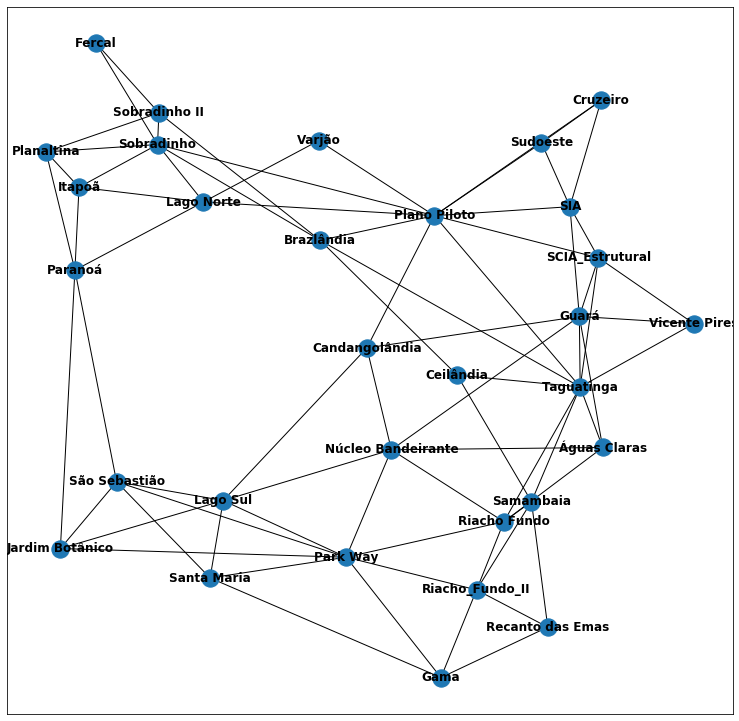

In [5]:
pos = nx.spring_layout(g)
plt.figure(3,figsize=(13,13)) 
nx.draw_networkx(g, with_labels=True, font_weight='bold')

In [6]:
path = nx.dijkstra_path(g,source='Varjão', target='Sudoeste')

In [7]:
import heapq

def dijkstra(g,s,f):
    visitados = {}
    dist = {}
    pred = {}
    for node in g.nodes():
        visitados[node] = 0
        dist[node] = 999999
        pred[node] = -1
    
    dist[s] = 0
    pred[s] = s
    pq = [] #priority queue
    
    heapq.heappush(pq, (0, s))
    
    while len(pq):
        distancia, atual = heapq.heappop(pq)
        
        if visitados[atual]:
            continue
        visitados[atual] = 1
        
        for vizinho in bsb[atual]:
            vizinho,peso = vizinho
            if dist[vizinho] > distancia + peso:
                dist[vizinho] = distancia + peso
                heapq.heappush(pq, (dist[vizinho], vizinho))
                pred[vizinho] = atual
    return pred

In [8]:
pred = dijkstra(g,'Varjão','Sudoeste')

In [21]:
x = 'Sudoeste'
print(x)
path = []
path.append(x)
while x != 'Varjão':
    x = pred[x]
    print(x)
    path.append(x)
    

Sudoeste
Plano Piloto
Varjão


In [22]:
path = nx.shortest_path(g,source='Varjão',target='Sudoeste')
path

['Varjão', 'Plano Piloto', 'Sudoeste']

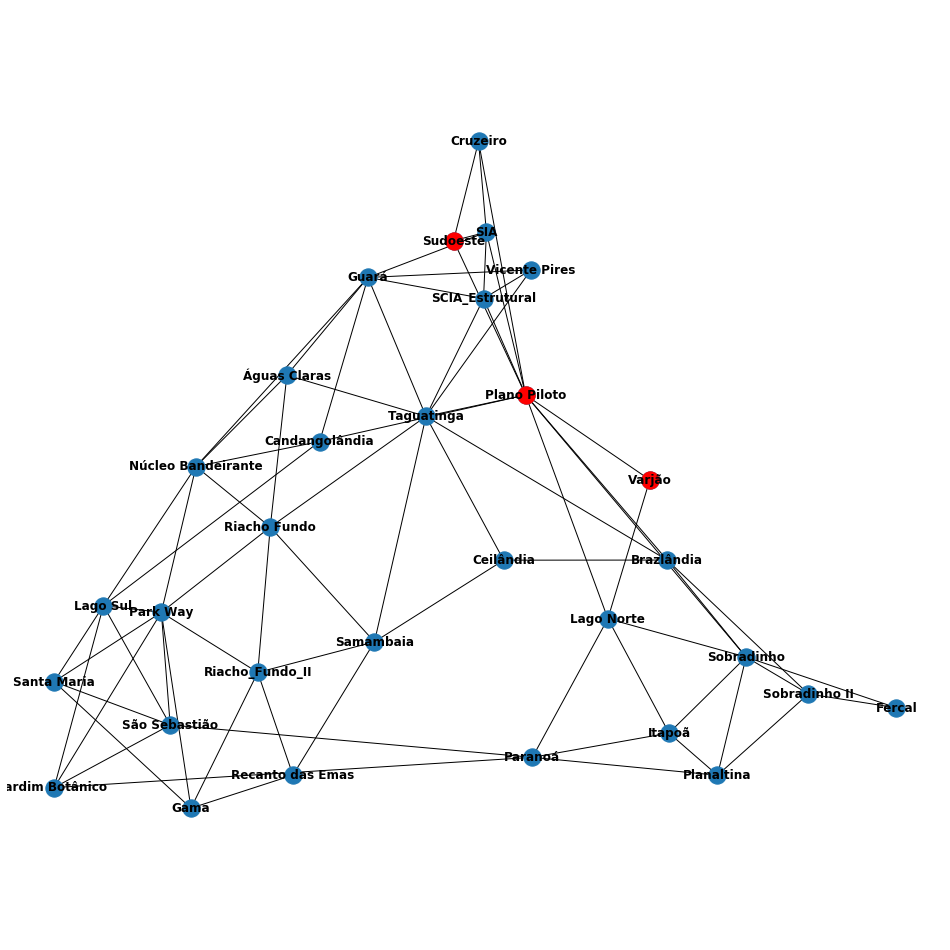

In [25]:
pos = nx.spring_layout(g)
plt.figure(3,figsize=(13,13)) 
nx.draw(g, pos, with_labels=True, font_weight='bold')

nx.draw_networkx_nodes(g,pos,nodelist=path,node_color='r')
plt.axis('equal')
plt.show()